In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open dfs
bact_f = pd.read_table('proteobacteria-f_fitch_g-b.txt')
bact_g = pd.read_table('proteobacteria-g_fitch_g-b.txt')
fun = pd.read_table('fungi_fitch_g-b.txt')
euk = pd.read_table('eukaryota_fitch_g-b.txt')
archaea = pd.read_table('archaea_fitch_g-b.txt')

# merging the training set
frames = [archaea, fun, euk]
train = pd.concat(frames)
test = bact_f

# Create a list of the feature column's names
features = train.columns[1:-1]
X_train = train[features].as_matrix()
X_test = test[features].as_matrix()

y_train = train['division'] == 'good'
y_test = test['division'] == 'good'

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [5]:
#from sklearn.decomposition import PCA
#pca = PCA().fit(X_train)
#pca_samples = pca.transform(X_train)

In [ ]:
#NO! NOT READY!

# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = train.columns.values[1:-1]) 
components.index = dimensions

# PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
variance_ratios.index = dimensions

# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))

# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar')
ax.set_ylabel("Feature Weights") 
ax.set_xticklabels(dimensions, rotation=0)

# Display the explained variance ratios# 
#for i, ev in enumerate(pca.explained_variance_ratio_): 
    #ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

# Return a concatenated DataFrame
#return pd.concat([variance_ratios, components], axis = 1)

#pca_results = pca_results(data, pca)

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [8]:
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

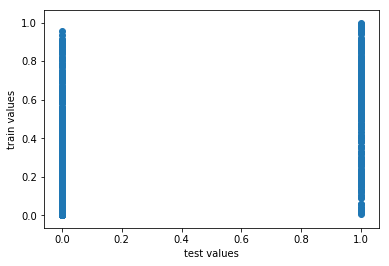

In [9]:
#we are bad af in prediction: wery wide range in both cases
plt.scatter(y_test, predicted_test)
plt.xlabel("test values")
plt.ylabel("train values")
plt.show()

In [10]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

In [11]:
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print 'Test data Spearman correlation: ', spearman
print 'Test data Pearson correlation: ', pearson

Test data Spearman correlation:  SpearmanrResult(correlation=0.49086447197690436, pvalue=5.1939158331641939e-46)
Test data Pearson correlation:  (0.51735164632144548, 9.3079440140703811e-52)
